#  Analyzing and Making Predictions of Tech Stocks
In this project, I will use pandas to analyze data, including value, risk and return metrics, of the prominent 'FAANG' companies: Facebook, Apple, Amazon, Netflix, and Google. Here are some of the questions I'll address in this notebook:


What was the change in our stock’s price over time?
What was the moving average of our stocks?
What was the daily return average of a stock?
What was the correlation between daily returns of different stocks?
How much value do we put at risk by investing in a particular stock?
How can we attempt to predict future 'FAANG'-stock behavior?

In [31]:
#pip install yfinance

In [28]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

I will be comparing the five "FAANG" companies to analyze their average stock prices and returns to ultimately perform a risk assessment of the stocks in the last 365 days. 

In [4]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX']

end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Here I've listed simple statistics regarding the stock price of Netflix in the previous year.

In [5]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,518.337834,525.145746,511.523585,518.307873,518.307873,4.399774e+06
std,26.516602,27.095350,26.553674,27.031166,27.031166,2.997842e+06
min,467.690002,477.000000,458.600006,469.959991,469.959991,1.067775e+06
25%,498.860008,504.532501,492.055008,498.062508,498.062508,2.829950e+06
50%,514.730011,520.785004,507.065002,514.940002,514.940002,3.733750e+06
75%,537.640015,544.550018,529.872528,538.277481,538.277481,5.102325e+06
max,606.469971,615.599976,600.890076,606.710022,606.710022,3.263750e+07


In [6]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-09-08 to 2021-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       254 non-null    float64
 1   High       254 non-null    float64
 2   Low        254 non-null    float64
 3   Close      254 non-null    float64
 4   Adj Close  254 non-null    float64
 5   Volume     254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


## Change in Stock Price Over Time

<AxesSubplot:xlabel='Date'>

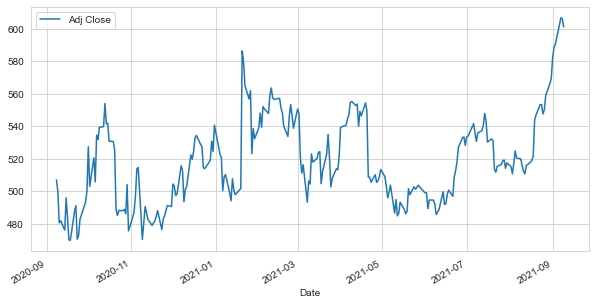

In [7]:
NFLX['Adj Close'].plot(legend = True, figsize = (10,5))

<AxesSubplot:xlabel='Date'>

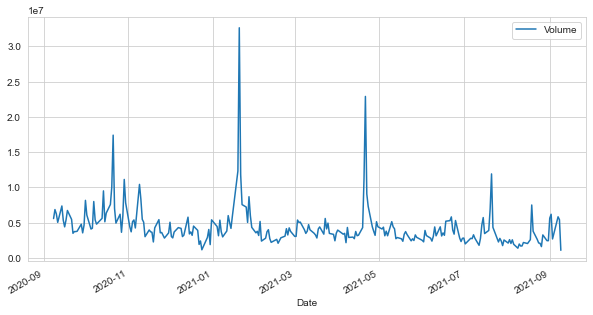

In [8]:
NFLX['Volume'].plot(legend = True, figsize = (10,5))

After a strong first quarter, Netflix stock prices have fluctuated around $375 while its volume has decreased to around 600,000 shares per day. Now let's calculate a few different moving averages to smooth out variations in our data and obtain a better trend.

## Calculating Moving Averages

In [9]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()

In [10]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Date,,,,,,,,,
2021-09-02,583.679993,598.760010,583.679993,588.549988,588.549988,6179900,561.622998,535.992799,532.476799
2021-09-03,585.799988,591.880005,583.140015,590.530029,590.530029,2681200,565.988000,538.911200,533.926200
2021-09-07,594.690002,613.849976,593.989990,606.710022,606.710022,5821400,571.326001,542.573600,535.519000
2021-09-08,603.840027,615.599976,595.710022,606.049988,606.049988,5417100,576.590002,546.382799,536.979399
2021-09-09,606.469971,609.440002,600.890076,601.099976,601.099976,1067775,581.941998,549.732799,538.331399


<AxesSubplot:xlabel='Date'>

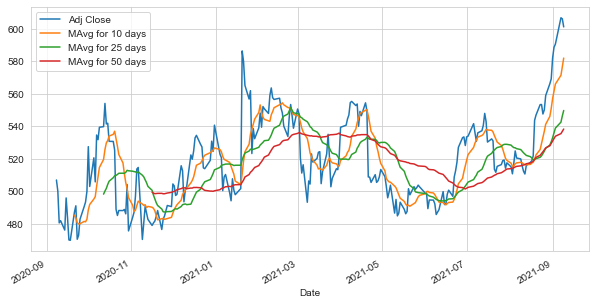

In [11]:
NFLX[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

The 50-day moving average supports our observation that Netflix's stock has remained consistent at $365 for the past three months. This plot also reveals the approximate crossover points that tell us when Netflix's stock trend is increasing or decreasing. Now let's calculate the average daily returns for Netflix's stock.

## Daily Return Averages.


In [12]:
#The daily return column can be created by using the percentage change over the adjusted closing price
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2021-09-02,583.679993,598.760010,583.679993,588.549988,588.549988,6179900,561.622998,535.992799,532.476799,0.011133
2021-09-03,585.799988,591.880005,583.140015,590.530029,590.530029,2681200,565.988000,538.911200,533.926200,0.003364
2021-09-07,594.690002,613.849976,593.989990,606.710022,606.710022,5821400,571.326001,542.573600,535.519000,0.027399
2021-09-08,603.840027,615.599976,595.710022,606.049988,606.049988,5417100,576.590002,546.382799,536.979399,-0.001088
2021-09-09,606.469971,609.440002,600.890076,601.099976,601.099976,1067775,581.941998,549.732799,538.331399,-0.008168


<AxesSubplot:xlabel='Date'>

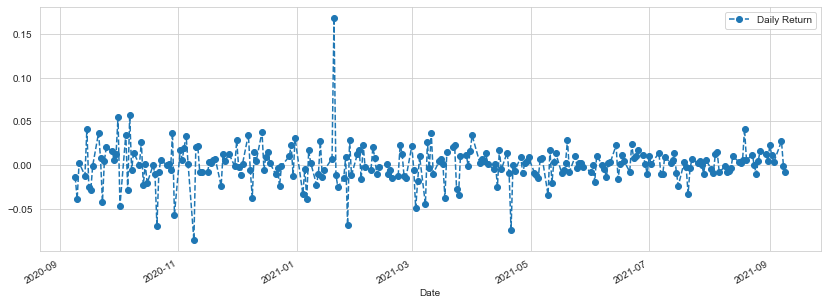

In [13]:
NFLX['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

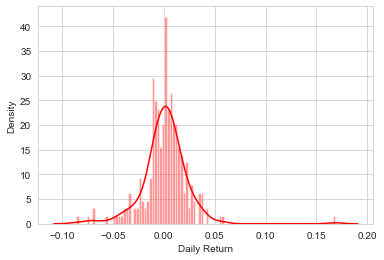

In [29]:
sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='red')

Using Seaborn to plot our axes, we find that the distribution of daily returns is concentrated heavily around 0 with little skew toward positive or negative returns.

## Correlation Between Different Daily Stock Returns

Now let's examine the trend between some pairs of the 'FAANG' stocks using Seaborn's joint plot feature, using the percent change of daily returns.

In [15]:
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2021-09-02,0.007475,-0.004564,-0.011129,-0.002253,0.011133
2021-09-03,0.004230,0.004311,0.003855,-0.000033,0.003364
2021-09-07,0.015489,0.008982,0.005139,-0.003188,0.027399
2021-09-08,-0.010084,0.004619,-0.004367,0.000100,-0.001088
2021-09-09,0.001257,0.001214,0.003648,-0.001715,-0.007376


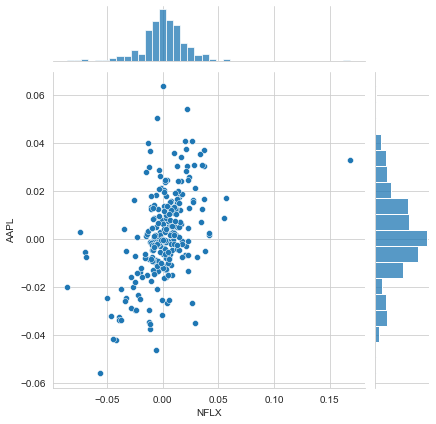

In [30]:
sns.jointplot('NFLX','AAPL',rets_compr,kind='scatter')

There seems to be a moderate correlation between Netflix and Apple returns. I'll generate all of the pairwise plots to see if there are any stronger correlations.

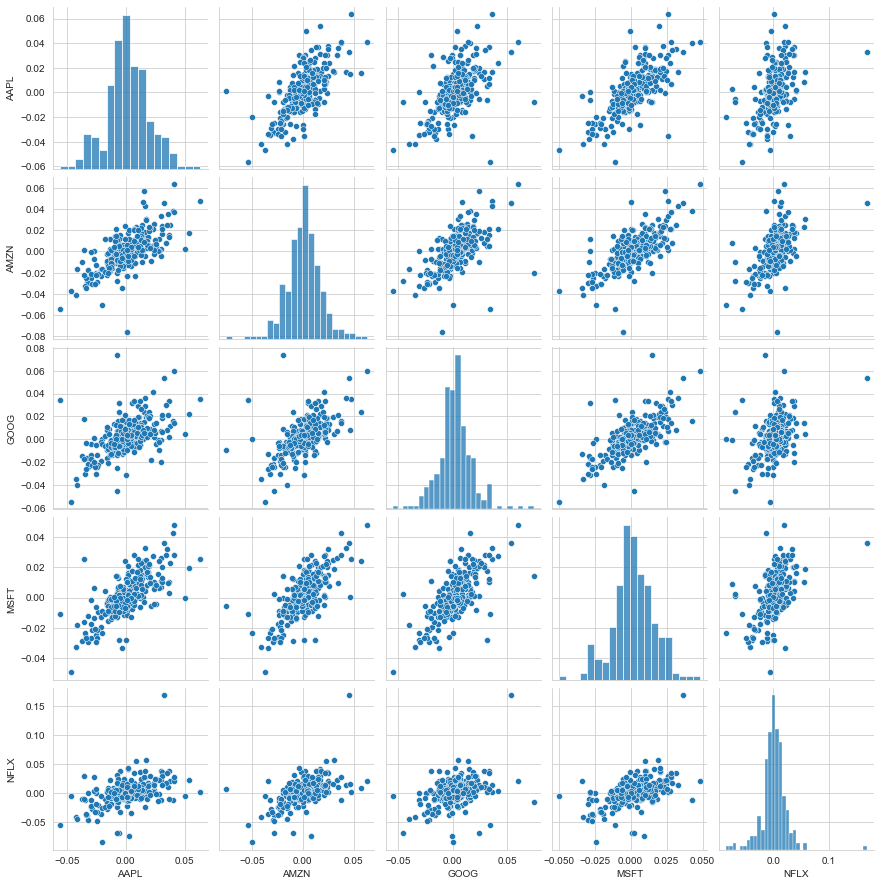

In [17]:
sns.pairplot(rets_compr.dropna())

There seems to be stronger correlations between Amazon and Microsoft, though to be sure we need another visualization tool. The correlation matrix plot, which allows us to view the pairwise confidence intervals together, is a great option for doing this.

          AAPL      AMZN      GOOG      MSFT      NFLX
AAPL  1.000000  0.679099  0.542994  0.722540  0.469819
AMZN  0.679099  1.000000  0.582277  0.716141  0.551639
GOOG  0.542994  0.582277  1.000000  0.690028  0.382235
MSFT  0.722540  0.716141  0.690028  1.000000  0.493939
NFLX  0.469819  0.551639  0.382235  0.493939  1.000000


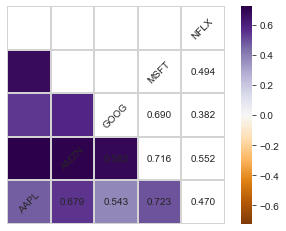

In [18]:
corr = rets_compr.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

From the correlation heatmap, it becomes clear that Microsoft and Amazon share a stronger correlation, and in general
Microsoft maintains a strongest pairwise aggregate correlations compared to the rest of the 'FAANG' companies. Though perhaps expected, it is noteworthy that all five companies pairwise have moderate to strong positive correlation.

## Determining Value from Risk vs. Expected Return
Now we address the question of risk in buying stocks to compare these five companies.

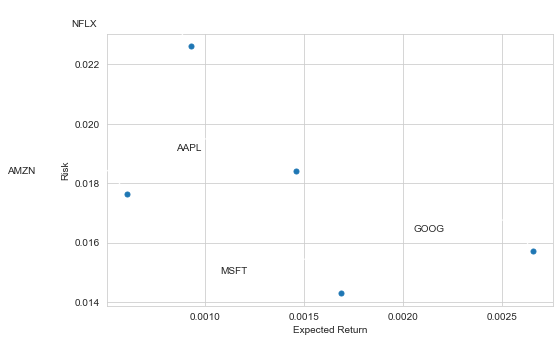

In [20]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

From this plot we can see that Microsoft has the highest expected return and the lowest risk -- a sign that it is the best stock to buy at the moment. With its overhaul of its cloud computing sectors and high-profile acquisitions, Microsoft stock is a clear winner here. Netflix's performance is more concerning as it has virtually zero positive expected return along with the highest risk.

We want to model an additional value-at-risk metric in order to assess the value at each risk confidence interval for these 5 companies. Let's try this two ways: bootstrapping and using Monte Carlo-GBM, with Google.

In [21]:
rets_compr.head()

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2020-09-08,NaN,NaN,NaN,NaN,NaN
2020-09-09,0.039887,0.037707,0.016034,0.042584,-0.013471
2020-09-10,-0.032646,-0.028605,-0.016018,-0.028018,-0.039025
2020-09-11,-0.013129,-0.018547,-0.007376,-0.006525,0.002829
2020-09-14,0.030000,-0.004252,-0.000947,0.006764,-0.011970


In [22]:
rets_compr['GOOG'].quantile(q=0.05)


-0.02290985275698891

In [23]:
rets_compr['GOOG'].quantile(q=0.01)



-0.03703704293930088

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 2.65 percent with 95% confidence and 5.04 percent with 99% confidence.

## Predicting Future Risk and Value of Stocks
We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [24]:
days = 365

#delta t
dt = 1/365

mu = rets_compr.mean()['GOOG']

sigma = rets_compr.std()['GOOG']


def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We’re going to run 100 Monte Carlo simulations of Google stocks. Here's the stock's opening values again.



In [25]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-08,1533.510010,1563.864990,1528.010010,1532.390015,1532.390015,2610900
2020-09-09,1557.530029,1569.000000,1536.051025,1556.959961,1556.959961,1774700
2020-09-10,1560.640015,1584.081055,1525.805054,1532.020020,1532.020020,1618600
2020-09-11,1536.000000,1575.199951,1497.359985,1520.719971,1520.719971,1597100
2020-09-14,1539.005005,1564.000000,1515.739990,1519.280029,1519.280029,1696600


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

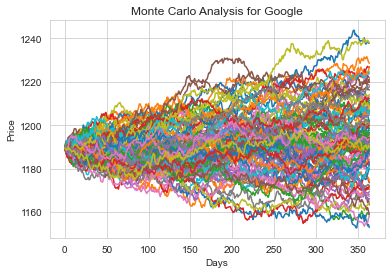

In [26]:
start_price = 1189.39 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

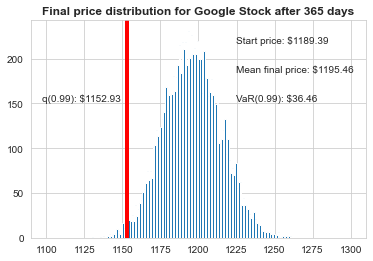

In [27]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200,range = [1100,1300])

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

Based off the histogram, we conclude that Google's stock price is very stable (only a $0.11 difference between start and mean final price). The value-at-risk of our investment is $46.42 for maximum low price of $1142.97 with 99% confidence, which is approximately a 3.9% risk compared to the 6.5% we achieved via bootstrapping. 